In [2]:
!pip install patched-yolo-infer

In [4]:
import cv2
import numpy as np
import time

In [6]:
from ultralytics import YOLO

from patched_yolo_infer import (
    visualize_results_usual_yolo_inference,
)

In [7]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Не удалось открыть веб-камеру")

# Захват кадра 
ret, frame = cap.read()

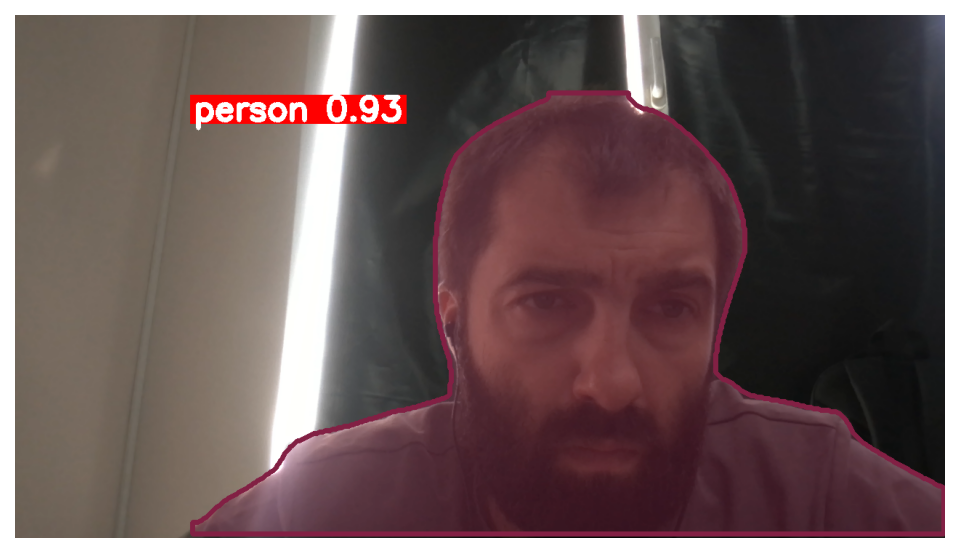

In [10]:
# Define the parameters
imgsz = 640
conf = 0.25
iou = 0.7

# Load the YOLOv8 model
model = YOLO("yolov8m-seg.pt") 

visualize_results_usual_yolo_inference(
    frame,
    model,
    imgsz,
    conf,
    iou,
    segment=True,
    delta_colors=1,
    thickness=6,
    font_scale=1.5,
    show_boxes=False,
    fill_mask=True,
    alpha=0.35,
    show_confidences=True,
)

In [12]:
class FPS_Counter:
    def __init__(self, calc_time_perion_N_frames: int) -> None:
        self.time_buffer = []
        self.calc_time_perion_N_frames = calc_time_perion_N_frames

    def calc_FPS(self) -> float:
        time_buffer_is_full = len(self.time_buffer) == self.calc_time_perion_N_frames
        t = time.time()
        self.time_buffer.append(t)

        if time_buffer_is_full:
            self.time_buffer.pop(0)
            fps = len(self.time_buffer) / (self.time_buffer[-1] - self.time_buffer[0])
            return np.round(fps, 2)
        else:
            return 0.0

def calc_and_show_fps(frame, fps_counter):
    fps_real = fps_counter.calc_FPS()
    text = f"FPS: {fps_real:.1f}"

    fontFace = 1
    fontScale = 1.3
    thickness = 1
    
    (label_width, label_height), _ = cv2.getTextSize(
        text,
        fontFace=fontFace,
        fontScale=fontScale,
        thickness=thickness,
    )
    frame = cv2.rectangle(frame, (0, 0), (10 + label_width, 15 + label_height), (0, 0, 0), -1)
    frame = cv2.putText(
        img=frame,
        text=text,
        org=(5, 20),
        fontFace=fontFace,
        fontScale=fontScale,
        thickness=thickness,
        color=(255, 255, 255),
    )
    return frame

In [ ]:
# Define the parameters
imgsz = 640
conf = 0.25
iou = 0.7

# Load the YOLOv8 model
model = YOLO("yolov8m-seg.pt") 

fps_counter = FPS_Counter(calc_time_perion_N_frames=10)

webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print('Cant open webcam')

webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

while True:
    ret, frame = webcam.read()

    if not ret:
        print('Cant get frame from webcam')
        break

    frame = visualize_results_usual_yolo_inference(
        frame,
        model,
        imgsz,
        conf,
        iou,
        segment=True,
        delta_colors=1,
        thickness=6,
        font_scale=1.5,
        show_boxes=False,
        fill_mask=True,
        alpha=0.35,
        show_confidences=True,
        return_image_array=True
    )

    scale = 0.5
    frame = cv2.resize(frame, (-1, -1), fx=scale, fy=scale)

    frame = calc_and_show_fps(frame, fps_counter)

    cv2.imshow('Webcam', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()

2025-09-06 12:25:52.755 python[48920:3317912] +[IMKClient subclass]: chose IMKClient_Modern
2025-09-06 12:25:52.755 python[48920:3317912] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Detection:

In [14]:
# Define the parameters
imgsz = 640
conf = 0.25
iou = 0.7

# Load the YOLOv8 model
model = YOLO("yolov8m.pt") 

fps_counter = FPS_Counter(calc_time_perion_N_frames=10)

webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print('Cant open webcam')

webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

while True:
    ret, frame = webcam.read()

    if not ret:
        print('Cant get frame from webcam')
        break

    frame = visualize_results_usual_yolo_inference(
        frame,
        model,
        imgsz,
        conf,
        iou,
        segment=False,
        delta_colors=1,
        thickness=6,
        font_scale=1.5,
        show_boxes=True,
        show_confidences=False,
        return_image_array=True
    )

    scale = 0.5
    frame = cv2.resize(frame, (-1, -1), fx=scale, fy=scale)

    frame = calc_and_show_fps(frame, fps_counter)

    cv2.imshow('Webcam', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()

100%|██████████████████████████████████████| 49.7M/49.7M [00:10<00:00, 4.98MB/s]
